<br><br>
<img src='aisg_logo.png' width="700px">  
<br>
# AI Apprentice Programme
## Take-home Written Assignment

### Problem 5 - Machine Learning
__This problem is compulsory for all candidates.__

The core of artificial intelligence problems today are machine learning algorithms - they have brought new heights to the capabilities of AI. Although AI engineering goes way beyond model building, having modelling and data analytical knowledge is core for any AI engineer today.

Hence, this problem will test your ability to build a basic model based on a given dataset. This will be an open-ended problem, and your goal is to build a model to predict a given Y, then provide justification for model evaluation and report your results. Your end goal is 1) a model, and 2) a write up of approximately 2 pages on your modelling process.

You will be assessed on your ability to build a performant model through a scientific process, but also on your ability to write clean, reproducible code. While you may use any library, you should display your ability to handle any model you use - that is, your ability to tune the model and work beyond a simple API call.

You are open to use all kinds of models in this exercise - __we are not looking only for the most cutting edge model__, but also your ability to work with data, and conduct model tuning and selection. While accuracy is important, we will also favour a well-justified and fitted linear regression model over a blind call of a black box API if you do not display mastery over the black box model you are using.

You should be able to complete this question in 2-3 hours. However, you are not restricted to this time frame.

### Problem

In many organisations with data-heavy operations or machine learning products, there exists a need for a lot of compute power. Compute power is distributed to scientists in two main ways - through scaling out and scaling up. Scaling out involves virtualising and instantiating computers that run computation jobs separately, while scaling up involves building up a large computer with massive computational power that runs computation jobs sequentially. This is known as High Performance Computing (HPC).

Our problem involves the operation of a HPC. While a naive way to manage jobs within the HPC computer would be through a first-in, first-out (FIFO) queue, this might not be optimal. In some scenarios, a job that takes just a few minutes might end up waiting for previous jobs that take days to finish before it can start. Instead, HPC computers typically have a job scheduler that manages the jobs, giving priority to those that are deemed to be more important, or deemed to be completed more quickly.

To help the job scheduler understand which jobs to prioritise, we have a machine learning problem to predict the time it will take for the job submitted to finish. Given a list of parameters (explained below), we predict how long it takes for the job to finish. To simplify the problem, the duration has been reduced from a continuous duration (regression problem) into categories (classification problem). We have the categories of 0: less than 1min, 1: 1-10mins, 2: 10mins-1hr or 3: \>1hr. Build a model to predict the `duration` variable.

### Variables
|column|description|
|-|-|
|`Unnamed: 0`|index column|
|`type`|types of model categories, labels removed|
|`time`|time as percentage of day that passed, i.e. 0.5 = 12 noon|
|`dayofweek`| day of week, 1 = monday, 7 = sunday |
|`models`|number of models executed by script|
|`params`|number of parameters to run in script|
|`queuelen`|number of jobs in queue to at time where job was initialised|
|`trials`|number of trials ran by model for model testing |
|`duration`| categorical duration of model, as specified above|

### Dataset
You may find the dataset stored as a text file in `data_ml.csv`.

In [1]:

# df = pandas.read_csv('data_ml.csv')

### Deliverables
#### 1. Code
Please give us the script or notebook you use to model. We allow both R and Python. Do check with us if you wish to other other languages. Please also ensure that your file runs, as we may run it to test that your model truly produces the results you promise. Lastly, please ensure your code is of quality.

#### 2. Report
Please submit a report with writing of not more than 2 pages in length (this is only writing - we allow it to stretch if you have ample visualisations). However, please be concise in your report. You are expected to include:
- Exploratory Data Analysis
- Feature engineering (you are allowed to drop or include additional data columns)
- Model selection and tuning
- Model interpretation
- Metrics for model evaluation (please at least provide a confusion matrix - you can go beyond a confusion matrix).

These deliverables can be submitted as a notebook, or as a script + a PDF report.

### Code of Honour
By completing this assignment and submitting your response, you automatically declare that your work is your own without plagiarisation. Should we find that you have copied your solution, your response will be heavily penalised.

__This is the final assignment. Thank you for your hard work, and for applying to the AI Apprentice Programme! :)__

# Let's do this

# FULL NAME: TAM HOU HENG
# GITHUB USERNAME: noelcodes

In [2]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import seaborn as sns
# Normalisation (0 to +1) (MinMaxScaler)
from sklearn.preprocessing import MinMaxScaler
from keras.layers import BatchNormalization
from keras import optimizers
from keras.layers import Flatten, Dropout


C:\Users\default.LAPTOP-2CI68M4P\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Baseline
Did nothing to the dataset, just to have an idea, to see where are we now from good prediction. Use this as baseline.

In [3]:

df_baseline = pd.read_csv('data_ml.csv')
df_baseline.drop(columns='Unnamed: 0' , axis=1, inplace=True)

In [4]:
df_baseline.head()

,type,time,dayofweek,models,params,queuelen,trials,duration
0,13.0,0.568056,2.0,148.0,11252.0,0.0,40.0,2.0
1,12.0,0.715972,2.0,7.0,5923.0,0.0,40.0,1.0
2,13.0,0.222917,5.0,62.0,1906.0,1.0,20.0,0.0
3,5.0,0.424306,5.0,8.0,4023.0,30.0,40.0,0.0
4,12.0,0.672222,5.0,1.0,2480.0,0.0,40.0,1.0


In [5]:
df_baseline.fillna(df_baseline.mean(), inplace = True)
df_baseline.isnull().sum() 

type         0
time         0
dayofweek    0
models       0
params       0
queuelen     0
trials       0
duration     0
dtype: int64

In [29]:
X = df_baseline.drop("duration", axis=1).values
y = df_baseline['duration'].values
y = label_binarize(y, classes=[0, 1, 2])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [30]:
# Used RandomForestClassifier with reference to machine learning chart, explaination later
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(X_train, y_train)

print('RandomForestClassifier : \n' , classification_report(y_test, rf.predict(X_test)))
y_pred = rf.predict(X_test)

confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))


RandomForestClassifier : 
              precision    recall  f1-score   support

          0       0.78      0.78      0.78       689
          1       1.00      0.01      0.01       370
          2       0.00      0.00      0.00       153

avg / total       0.75      0.44      0.44      1212



C:\Users\default.LAPTOP-2CI68M4P\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[777,   0,   0],
       [368,   2,   0],
       [153,   0,   0]], dtype=int64)

In [31]:
# Use deep learning with reference to machine learning chart, explaination later
def build_model():
    model = Sequential()
    model.add(Dense(7, input_dim=7, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

keras_model = build_model()
keras_model.fit(x=X, y=y, batch_size=20, 
                epochs=10, verbose=2, callbacks=None, 
                validation_split=0.3, validation_data=None, 
                shuffle=True, class_weight=None, sample_weight=None, 
                initial_epoch= 0, steps_per_epoch=None, 
                validation_steps=None)


Train on 3031 samples, validate on 1300 samples
Epoch 1/10
 - 0s - loss: 8.2629 - acc: 0.3464 - val_loss: 6.4610 - val_acc: 0.5731
Epoch 2/10
 - 0s - loss: 6.0540 - acc: 0.5539 - val_loss: 5.8103 - val_acc: 0.5646
Epoch 3/10
 - 0s - loss: 4.7624 - acc: 0.3913 - val_loss: 2.8158 - val_acc: 0.5662
Epoch 4/10
 - 0s - loss: 3.6391 - acc: 0.4952 - val_loss: 2.9377 - val_acc: 0.5177
Epoch 5/10
 - 0s - loss: 2.7601 - acc: 0.4576 - val_loss: 2.1186 - val_acc: 0.4254
Epoch 6/10
 - 0s - loss: 2.1706 - acc: 0.4306 - val_loss: 1.5329 - val_acc: 0.3123
Epoch 7/10
 - 0s - loss: 1.5389 - acc: 0.4042 - val_loss: 2.4419 - val_acc: 0.5062
Epoch 8/10
 - 0s - loss: 1.3039 - acc: 0.4289 - val_loss: 1.0831 - val_acc: 0.4446
Epoch 9/10
 - 0s - loss: 1.0407 - acc: 0.4246 - val_loss: 1.0186 - val_acc: 0.4708
Epoch 10/10
 - 0s - loss: 1.0123 - acc: 0.5609 - val_loss: 0.9999 - val_acc: 0.5708


# EDA

In [9]:
df = pd.read_csv('data_ml.csv')
df.drop(columns='Unnamed: 0' , axis=1, inplace=True)
df.head()

,type,time,dayofweek,models,params,queuelen,trials,duration
0,13.0,0.568056,2.0,148.0,11252.0,0.0,40.0,2.0
1,12.0,0.715972,2.0,7.0,5923.0,0.0,40.0,1.0
2,13.0,0.222917,5.0,62.0,1906.0,1.0,20.0,0.0
3,5.0,0.424306,5.0,8.0,4023.0,30.0,40.0,0.0
4,12.0,0.672222,5.0,1.0,2480.0,0.0,40.0,1.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4331 entries, 0 to 4330
Data columns (total 8 columns):
type         3905 non-null float64
time         4331 non-null float64
dayofweek    4331 non-null float64
models       4331 non-null float64
params       3989 non-null float64
queuelen     4331 non-null float64
trials       4331 non-null float64
duration     4331 non-null float64
dtypes: float64(8)
memory usage: 270.8 KB


In [11]:
df.isnull().sum() 

type         426
time           0
dayofweek      0
models         0
params       342
queuelen       0
trials         0
duration       0
dtype: int64

In [12]:
sorted(df.type.unique())

[0.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 nan,
 14.0]

In [13]:
# Dealng the Null in column "type": 
# |`type`|types of model categories, labels removed|
# It is a categorical data. 
# So I don't think taking the mean or any mathematical methods makes sense. 
# Decided to Replace Null values with SOMETHING, new type number 1.
# Since type 1 is missing.
df.type.replace(np.nan, float(1), regex=True, inplace=True)         
sorted(df.type.unique())

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0]

In [14]:
# Dummy the "type" so model won't confused it with numerical, and took it as well correlated, which is not good.
df_cat_dummy = pd.get_dummies(df['type'], prefix='type', drop_first=True)         #   Dummies all cats
df = pd.concat([df.drop('type', axis=1) , df_cat_dummy],  axis=1)   # Merge back togather numeric with cats
df.head()

,time,dayofweek,models,params,queuelen,trials,duration,type_1.0,type_2.0,type_3.0,...,type_5.0,type_6.0,type_7.0,type_8.0,type_9.0,type_10.0,type_11.0,type_12.0,type_13.0,type_14.0
0,0.568056,2.0,148.0,11252.0,0.0,40.0,2.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.715972,2.0,7.0,5923.0,0.0,40.0,1.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.222917,5.0,62.0,1906.0,1.0,20.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.424306,5.0,8.0,4023.0,30.0,40.0,0.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0.672222,5.0,1.0,2480.0,0.0,40.0,1.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
# Dealng the Null in column "param": 
# |`params`|number of parameters to run in script|
df.params.describe()

count      3989.000000
mean      10901.674354
std       26059.953210
min          71.000000
25%         952.000000
50%        2995.000000
75%        6940.000000
max      396701.000000
Name: params, dtype: float64

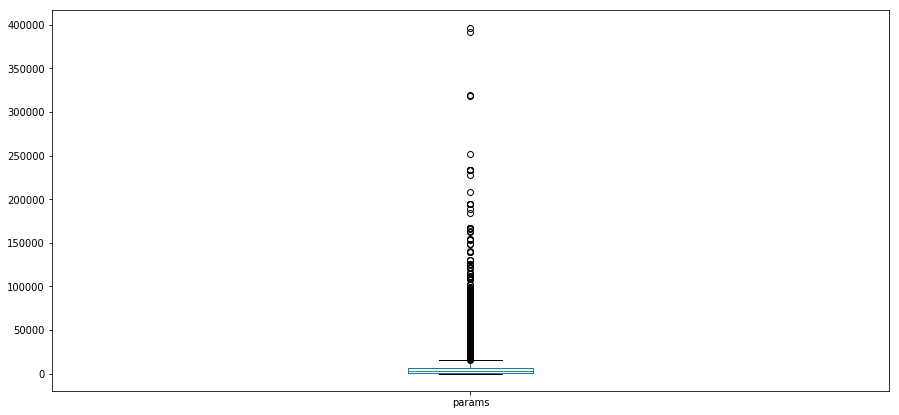

In [16]:
df['params'].plot(kind='box', stacked=True, figsize=(15,7))
# Wah... this params skewed like hell.
# Too many outlier, if remove might affect the distribution greatly. I think just leave it alone.
# I will do scaling anyway. 

In [17]:
# Replace Null cells with mean, since it does not affect the original distribution much.
df['params'].fillna(df['params'].mean(), inplace = True)

In [18]:
df.isnull().sum() 

time         0
dayofweek    0
models       0
params       0
queuelen     0
trials       0
duration     0
type_1.0     0
type_2.0     0
type_3.0     0
type_4.0     0
type_5.0     0
type_6.0     0
type_7.0     0
type_8.0     0
type_9.0     0
type_10.0    0
type_11.0    0
type_12.0    0
type_13.0    0
type_14.0    0
dtype: int64

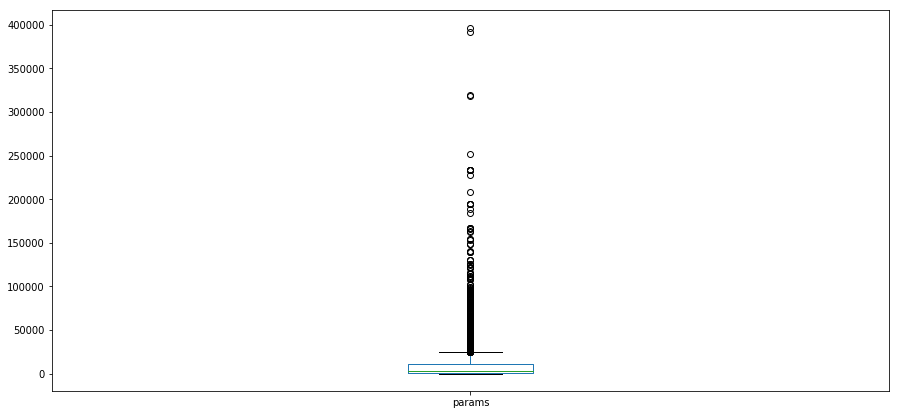

In [19]:
df['params'].plot(kind='box', stacked=True, figsize=(15,7))

In [20]:
# |`dayofweek`| day of week, 1 = monday, 7 = sunday |
# This is categorical data too.
print(df.dayofweek.unique())  # As suggested only 7 days.
df_cat_dummy = pd.get_dummies(df['dayofweek'], prefix='day', drop_first=True)         #   Dummies all cats
df = pd.concat([df.drop('dayofweek', axis=1) , df_cat_dummy],  axis=1)   # Merge back togather numeric with cats
df.head()

[2. 5. 3. 1. 4. 7. 6.]


,time,models,params,queuelen,trials,duration,type_1.0,type_2.0,type_3.0,type_4.0,...,type_11.0,type_12.0,type_13.0,type_14.0,day_2.0,day_3.0,day_4.0,day_5.0,day_6.0,day_7.0
0,0.568056,148.0,11252.0,0.0,40.0,2.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,0.715972,7.0,5923.0,0.0,40.0,1.0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,0.222917,62.0,1906.0,1.0,20.0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,0.424306,8.0,4023.0,30.0,40.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.672222,1.0,2480.0,0.0,40.0,1.0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [21]:
df.describe()

,time,models,params,queuelen,trials,duration,type_1.0,type_2.0,type_3.0,type_4.0,...,type_11.0,type_12.0,type_13.0,type_14.0,day_2.0,day_3.0,day_4.0,day_5.0,day_6.0,day_7.0
count,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,...,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000
mean,0.572203,71.756638,10901.674354,53.383514,58.479104,0.728007,0.098361,0.033941,0.032787,0.021011,...,0.049642,0.093281,0.110367,0.120065,0.207573,0.208266,0.166705,0.213115,0.007389,0.037174
std,0.165923,1701.084200,25009.629514,355.957245,68.839108,0.891271,0.297836,0.181099,0.178099,0.143438,...,0.217230,0.290859,0.313383,0.325075,0.405616,0.406115,0.372755,0.409555,0.085649,0.189209
min,0.000694,1.000000,71.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.454167,5.000000,1029.500000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.584722,13.000000,3240.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.691667,26.000000,10636.000000,0.000000,40.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.999306,87293.000000,396701.000000,5605.000000,400.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
# Preparing X and y
X = df.drop("duration", axis=1).values
mms = MinMaxScaler()
X = mms.fit_transform(X)

y = df['duration'].values
y = label_binarize(y, classes=[0, 1, 2])

# train_test_split 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [23]:
rf = RandomForestClassifier(max_depth=20, n_estimators=30)
rf.fit(X_train, y_train)

print('RandomForestClassifier : \n' , classification_report(y_test, rf.predict(X_test)))
y_pred = rf.predict(X_test)

confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

RandomForestClassifier : 
              precision    recall  f1-score   support

          0       0.87      0.89      0.88       662
          1       0.75      0.63      0.68       405
          2       0.81      0.45      0.58       144

avg / total       0.82      0.75      0.78      1211



array([[689,  57,   5],
       [139, 256,  10],
       [ 49,  30,  65]], dtype=int64)

# Fine turning - GridSearch with cv=10

In [24]:
from sklearn.grid_search import GridSearchCV

rfc = RandomForestClassifier() 

# The version below is already fine tuned, just in case you re-run this again to cut short run-time.
param_grid = { 
    'n_estimators': [2200],
    'max_depth' : [870],
    'max_features': [20]
}

CV_rfc = GridSearchCV(n_jobs=-1, estimator=rfc, param_grid=param_grid, cv= 10)
CV_rfc.fit(X_train, y_train)


C:\Users\default.LAPTOP-2CI68M4P\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\default.LAPTOP-2CI68M4P\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [2200], 'max_depth': [870], 'max_features': [20]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

# Metric -  classification_report / Confusion Matrix

In [25]:
print(CV_rfc.best_params_) # out[] : {'max_depth': 870, 'max_features': 'auto', 'n_estimators': 2200}
print('RandomForestClassifier : \n' , classification_report(y_test, CV_rfc.predict(X_test)))
y_pred = CV_rfc.predict(X_test)

confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

{'max_depth': 870, 'max_features': 20, 'n_estimators': 2200}
RandomForestClassifier : 
              precision    recall  f1-score   support

          0       0.89      0.89      0.89       662
          1       0.75      0.70      0.72       405
          2       0.69      0.50      0.58       144

avg / total       0.82      0.78      0.80      1211



array([[678,  57,  16],
       [105, 283,  17],
       [ 33,  39,  72]], dtype=int64)

# Deep learning
Just giving this method a shot. I have done a few different models, this one gets the best val_acc. Well, not as good as randomforest, so you may ignore the result here. Things that I have tried (I did not display here to avoid confusion), tried for example adding many layers, use batchnormaliztion, change activation to sigmoid instead of relu, optimaizer used adam instead of SGD. etc...

In [26]:
X.shape

(4331, 25)

In [27]:
# deep learning
def build_model():
    model = Sequential()
    model.add(Dense(25, input_dim=25, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=0.001), metrics=['accuracy'])
    return model


keras_model = build_model()
keras_model.fit(x=X, y=y, batch_size=10, 
                epochs=100, verbose=2, callbacks=None, 
                validation_split=0.3, validation_data=None, 
                shuffle=True, class_weight=None, sample_weight=None, 
                initial_epoch= 0, steps_per_epoch=None, 
                validation_steps=None)

Train on 3031 samples, validate on 1300 samples
Epoch 1/100
 - 1s - loss: 1.0170 - acc: 0.4226 - val_loss: 0.9969 - val_acc: 0.5085
Epoch 2/100
 - 0s - loss: 0.9894 - acc: 0.5081 - val_loss: 0.9725 - val_acc: 0.5238
Epoch 3/100
 - 0s - loss: 0.9683 - acc: 0.5328 - val_loss: 0.9534 - val_acc: 0.5623
Epoch 4/100
 - 0s - loss: 0.9519 - acc: 0.5592 - val_loss: 0.9388 - val_acc: 0.5615
Epoch 5/100
 - 0s - loss: 0.9392 - acc: 0.5599 - val_loss: 0.9270 - val_acc: 0.5646
Epoch 6/100
 - 0s - loss: 0.9289 - acc: 0.5645 - val_loss: 0.9174 - val_acc: 0.5677
Epoch 7/100
 - 0s - loss: 0.9204 - acc: 0.5668 - val_loss: 0.9095 - val_acc: 0.5677
Epoch 8/100
 - 0s - loss: 0.9133 - acc: 0.5665 - val_loss: 0.9030 - val_acc: 0.5685
Epoch 9/100
 - 0s - loss: 0.9074 - acc: 0.5681 - val_loss: 0.8975 - val_acc: 0.5700
Epoch 10/100
 - 0s - loss: 0.9024 - acc: 0.5688 - val_loss: 0.8928 - val_acc: 0.5715
Epoch 11/100
 - 0s - loss: 0.8980 - acc: 0.5694 - val_loss: 0.8886 - val_acc: 0.5731
Epoch 12/100
 - 0s - loss:

Epoch 97/100
 - 0s - loss: 0.7080 - acc: 0.6645 - val_loss: 0.7242 - val_acc: 0.6592
Epoch 98/100
 - 0s - loss: 0.7075 - acc: 0.6655 - val_loss: 0.7240 - val_acc: 0.6608
Epoch 99/100
 - 0s - loss: 0.7072 - acc: 0.6661 - val_loss: 0.7234 - val_acc: 0.6600
Epoch 100/100
 - 0s - loss: 0.7067 - acc: 0.6661 - val_loss: 0.7231 - val_acc: 0.6600


# Report

##### Goal:
Target y is to predict duration. In this case, its a classification problem, as duration is classed, [0,1,2]. 
Feature X, will be the rest of the columns.

##### Baseline:
Without doing any feature selection, its good to find out the baseline accuracy first, so that we know if there is any improvement from our model. <br>
Random Forest F1 score 0.44 <br>
Deep learning val_loss: 0.9999 - val_acc: 0.5708

##### Model selection:
Refering to the 2 charts below. Our data is only 4000 plus, supervised learning. So we need a multiclassifier. Ensemble decision tree (aka randomforest) or a neural network will be good enough. If there is more time, perhaps I will add in ensemble SVM, gradient boosting tree.

<img src='ml_chart1.png' width="800px"> 
<img src='ml_chart2.png' width="800px">

##### EDA
- Dataset is not big. Only 8 features, and 4000 plus rows. 
- We had to deal with Null values found in Type and Param.
- Type is types of model categories, It is a categorical data. 10% are null. So I don't think taking the mean or any mathematical methods makes sense. Therefore decided to replace Null values with a new type number 1, since type#1 is missing. <br>
- Param is number of parameters to run in script, numerical data. 8% are null. The distribtion shewed with many outliers. Decided to replace null value with mean, since it does not affect the distribution. 
- dayofweek and type are categorical. And they are in accending order. Fitting such data into model will confuse the model for correlation, this is bad. Therefore get dummies is neccessary.
- Checking the rest of the distribution, almost all features are shewed and have many outliers. Removing outliers will alter the distribution and reduce size of the already small dataset. Therefore decided leave outliers alone and do MinMax scaling all X.

##### Feature selections cum Fine tuning
Even after dummy the categorical features, the dataset is not wide enough to be a concern. Therefore, decided to do feature selection and fine tuning together at one go through Gridsearch randonforest. <br>
Best result so far: <br>
Overall precision=0.82, recall=0.78, F1-score 0.80. This is a significant improvement from baseline. <br>
Whereas the deep learning NN method doesn't show much improvement even after adding more nodes or layers. Best val_acc 0.66. Some improvement from baseline, but not significant improvement.

#### Conclusion:
Randomforest is the winner over deep learning. Given more time, I will try other models such as ensemble SVM and gradient boosting tree, as the chart suggest that this are the other suitable model for a small dataset and for accuracy reason.